# Data Explaretion

In [ ]:
import pandas as pd
import io

# Reading the file, handling encoding errors
try:
    with open("/content/TMDB_movie_dataset_v11.csv", 'r', encoding='utf-8') as file:
        content = file.read()
except UnicodeDecodeError:
    with open("/content/TMDB_movie_dataset_v11.csv", 'r', encoding='latin-1') as file:
        content = file.read()

# Replace potential problematic line terminators
content = content.replace('\r\n', '\n')
content = content.replace('\r', '\n')

# Read the data using io.StringIO and specifying error handling
data = pd.read_csv(
    io.StringIO(content),
    on_bad_lines='skip',
    engine='python',
    sep=',',
    quotechar='"',
    encoding='utf-8'
)
data.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [ ]:
data.shape

(1126311, 24)

In [ ]:
data.isnull().sum()

,0
id,0
title,13
vote_average,0
vote_count,0
status,0
release_date,182523
revenue,0
runtime,0
adult,0
backdrop_path,826531


In [ ]:
data.duplicated().sum()

368

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1126311 entries, 0 to 1126310
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1126311 non-null  int64  
 1   title                 1126298 non-null  object 
 2   vote_average          1126311 non-null  float64
 3   vote_count            1126311 non-null  int64  
 4   status                1126311 non-null  object 
 5   release_date          943788 non-null   object 
 6   revenue               1126311 non-null  int64  
 7   runtime               1126311 non-null  int64  
 8   adult                 1126311 non-null  bool   
 9   backdrop_path         299780 non-null   object 
 10  budget                1126311 non-null  int64  
 11  homepage              119465 non-null   object 
 12  imdb_id               599988 non-null   object 
 13  original_language     1126311 non-null  object 
 14  original_title        1126298 non-

# Data Clening

## Remove unnecessary columns

In [ ]:
columns_to_drop = [
    'adult',
    'backdrop_path',
    'poster_path',
    'homepage',
    'imdb_id',
    'original_language',
    'original_title'
]

cleaned_df = data.drop(columns=columns_to_drop)
print("Columns after removal:", cleaned_df.columns.tolist())
print("New shape:", cleaned_df.shape)

Columns after removal: ['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date', 'revenue', 'runtime', 'budget', 'overview', 'popularity', 'tagline', 'genres', 'production_companies', 'production_countries', 'spoken_languages', 'keywords']
New shape: (1126311, 17)


In [ ]:
# Handle movies with zero runtime
print("Before runtime cleaning:", len(cleaned_df))
median_runtime = cleaned_df[cleaned_df['runtime'] > 0]['runtime'].median()
cleaned_df['runtime'] = cleaned_df['runtime'].replace(0, median_runtime)

# Remove extreme runtime outliers (e.g., 14400 minutes = 10 days)
cleaned_df = cleaned_df[cleaned_df['runtime'] <= 300]  # Remove movies longer than 5 hours
print("After runtime cleaning:", len(cleaned_df))

# Handle vote averages
# Remove movies with no votes as they don't have meaningful ratings
cleaned_df = cleaned_df[cleaned_df['vote_count'] > 0]
print("After vote cleaning:", len(cleaned_df))

print("\nRuntime statistics after cleaning:")
print(cleaned_df['runtime'].describe())

Before runtime cleaning: 1126311
After runtime cleaning: 1123218
After vote cleaning: 349275

Runtime statistics after cleaning:
count    349275.000000
mean         78.158196
std          40.443661
min           1.000000
25%          64.000000
50%          83.000000
75%          98.000000
max         300.000000
Name: runtime, dtype: float64


## Handle missing values

In [ ]:
# Drop row with missing value
data.dropna(inplace=True)

In [ ]:
import numpy as np

# Verify the quality of our cleaned data
def check_data_quality(df):
    """
    Perform quality checks on the cleaned dataset
    """
    print("Data Quality Report:")
    print("-" * 50)

    # 1. Check for any remaining nulls
    print("\n1. Null Values Check:")
    null_counts = df.isnull().sum()
    print(null_counts[null_counts > 0] if len(null_counts[null_counts > 0]) > 0 else "No null values found")

    # 2. Check value ranges for numeric columns
    print("\n2. Numeric Columns Summary:")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    print(df[numeric_cols].describe())

    # 3. Check unique values in categorical columns
    print("\n3. Categorical Columns Sample Counts:")
    categorical_cols = ['status', 'genres', 'production_companies', 'production_countries']
    for col in categorical_cols:
        print(f"\n{col} - Unique values count: {df[col].nunique()}")
        print("Sample values:", df[col].value_counts().head(3))

    # 4. Check for any suspicious values
    print("\n4. Suspicious Values Check:")
    print("Negative revenues:", len(df[df['revenue'] < 0]))
    print("Negative budgets:", len(df[df['budget'] < 0]))
    print("Zero runtimes:", len(df[df['runtime'] == 0]))

    return df

# Run quality check
cleaned_df = check_data_quality(cleaned_df)

Data Quality Report:
--------------------------------------------------

1. Null Values Check:
release_date              7000
overview                 37930
tagline                 266687
genres                   58905
production_companies    122737
production_countries     78048
spoken_languages         66286
keywords                186176
dtype: int64

2. Numeric Columns Summary:
                 id   vote_average     vote_count       revenue  \
count  3.492750e+05  349275.000000  349275.000000  3.492750e+05   
mean   4.273858e+05       6.082251      61.392831  2.080051e+06   
std    3.172144e+05       1.981374     572.303448  2.970378e+07   
min    2.000000e+00       0.000000       1.000000 -1.200000e+01   
25%    1.605340e+05       5.000000       1.000000  0.000000e+00   
50%    3.729890e+05       6.000000       3.000000  0.000000e+00   
75%    6.333675e+05       7.045000       8.000000  0.000000e+00   
max    1.381373e+06      10.000000   34495.000000  3.000000e+09   

           

## Remove duplicates and standardize dates

In [ ]:
initial_rows = len(cleaned_df)
cleaned_df = cleaned_df.drop_duplicates()
dropped_rows = initial_rows - len(cleaned_df)

print(f"Removed {dropped_rows} duplicate rows")
print(f"New shape: {cleaned_df.shape}")

Removed 9 duplicate rows
New shape: (349266, 17)


 ## Create derived features

In [ ]:
cleaned_df['release_date'] = pd.to_datetime(cleaned_df['release_date'], errors='coerce')
cleaned_df = cleaned_df.dropna(subset=['release_date'])

# Create date-related features
cleaned_df['release_year'] = cleaned_df['release_date'].dt.year
cleaned_df['release_month'] = cleaned_df['release_date'].dt.month

print("Sample of date features:")
print(cleaned_df[['release_date', 'release_year', 'release_month']].head())

Sample of date features:
  release_date  release_year  release_month
0   2010-07-15          2010              7
1   2014-11-05          2014             11
2   2008-07-16          2008              7
3   2009-12-15          2009             12
4   2012-04-25          2012              4


## Calculate ROI

In [ ]:
cleaned_df['roi'] = np.where(
    cleaned_df['budget'] > 0,
    (cleaned_df['revenue'] - cleaned_df['budget']) / cleaned_df['budget'],
    0
)

# Final dataset overview
print("Final Dataset Info:")
print(cleaned_df.info())
print("\nSample of final cleaned data:")
print(cleaned_df.head())

Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 342267 entries, 0 to 350175
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    342267 non-null  int64         
 1   title                 342267 non-null  object        
 2   vote_average          342267 non-null  float64       
 3   vote_count            342267 non-null  int64         
 4   status                342267 non-null  object        
 5   release_date          342267 non-null  datetime64[ns]
 6   revenue               342267 non-null  int64         
 7   runtime               342267 non-null  int64         
 8   budget                342267 non-null  int64         
 9   overview              306542 non-null  object        
 10  popularity            342267 non-null  float64       
 11  tagline               81130 non-null   object        
 12  genres                287651 non-null  obje

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")


sns.set_palette("husl")

# Check for Outliers using Box Plots and Histograms

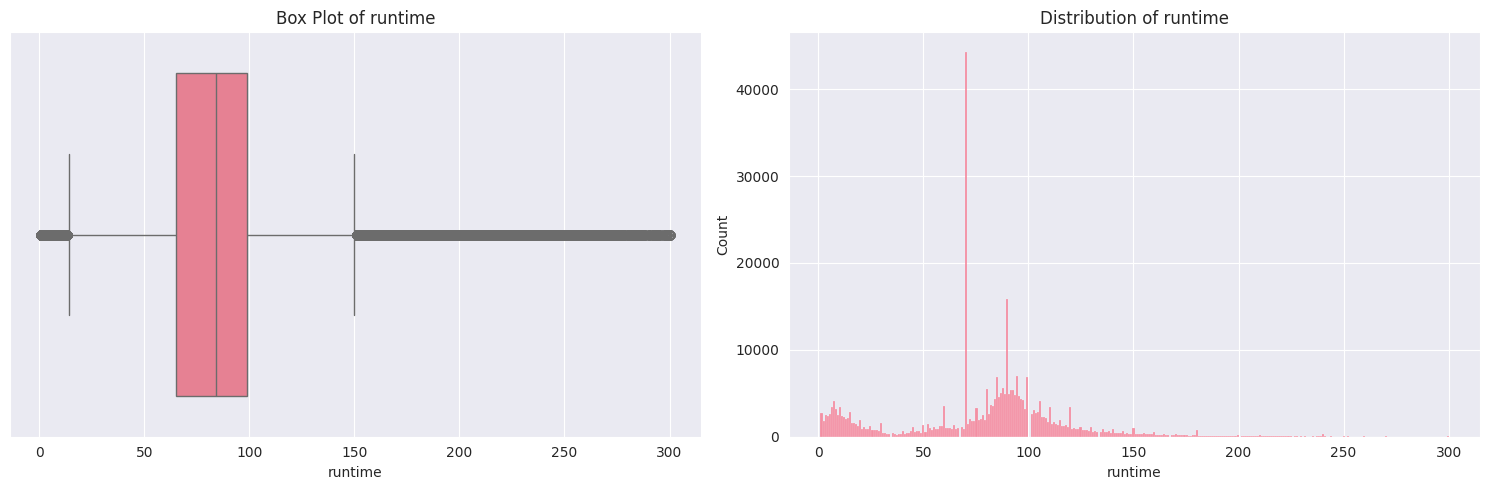

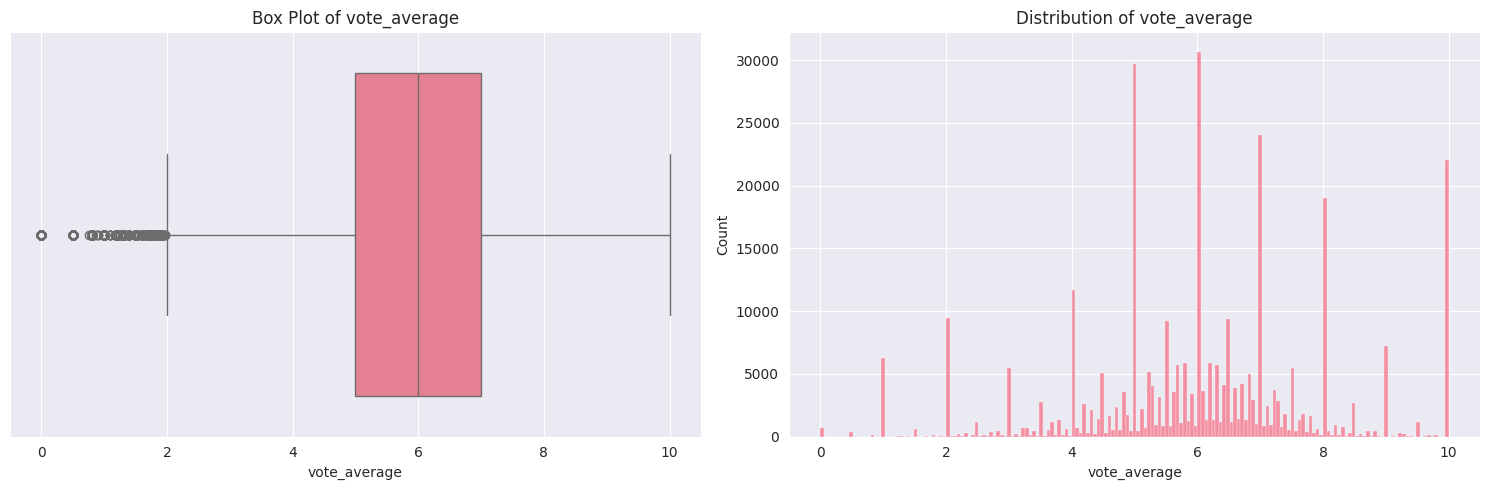

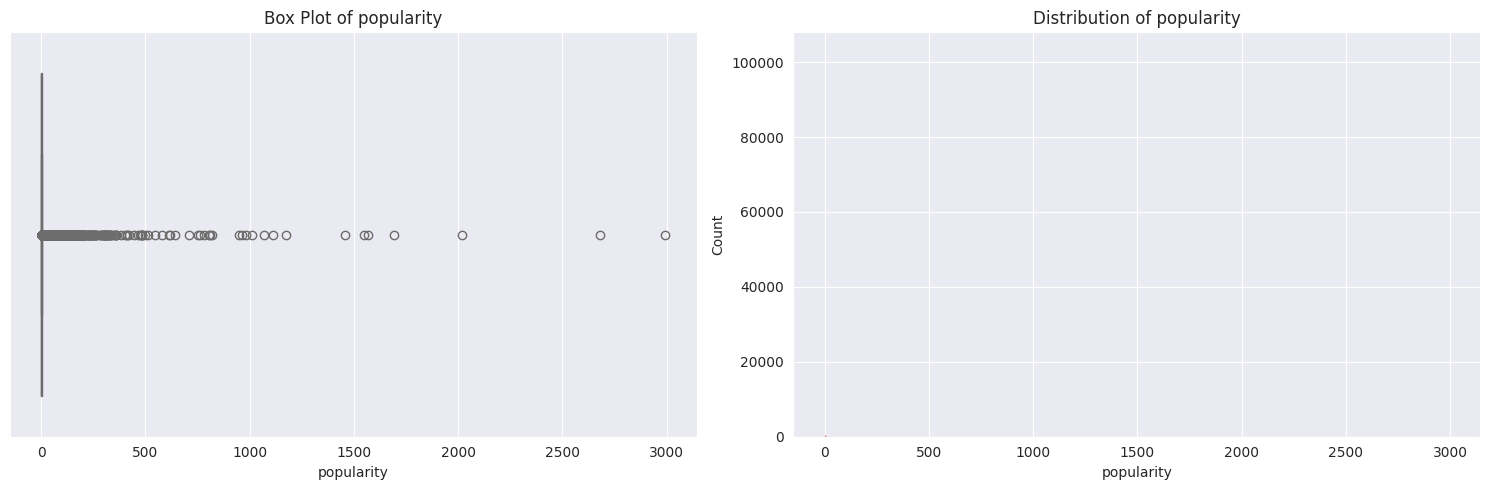

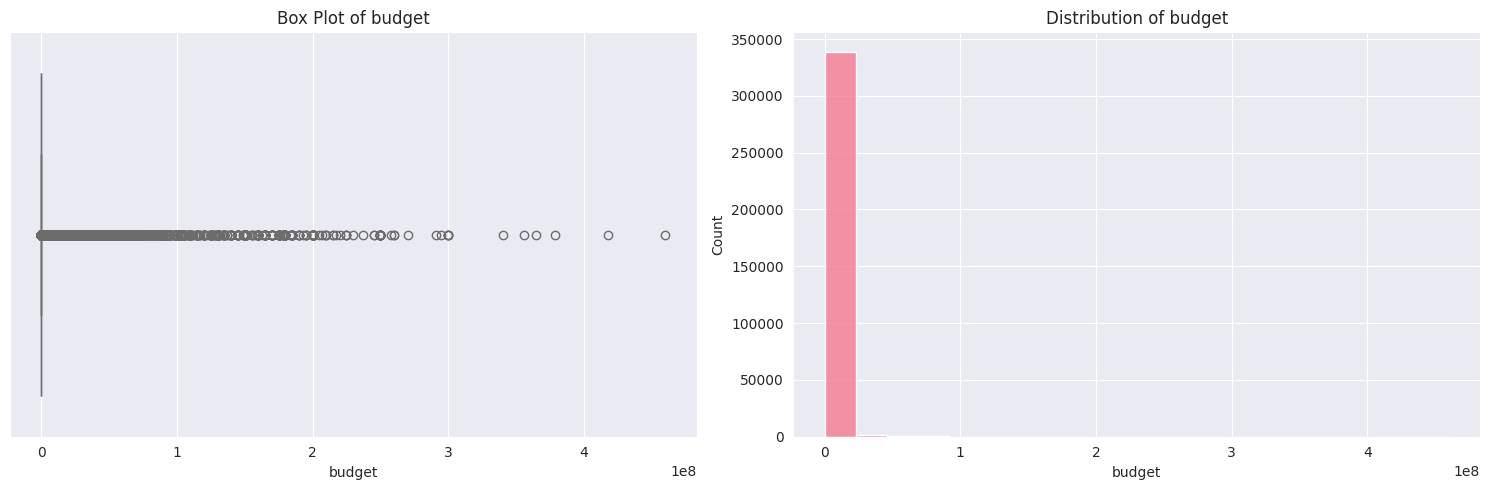

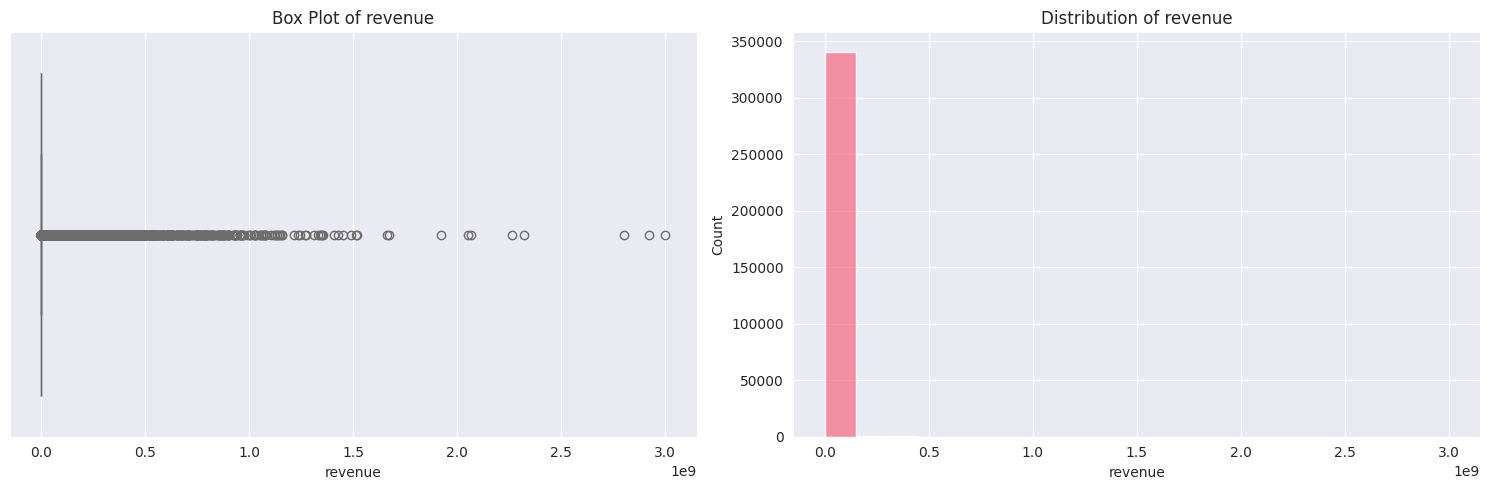

In [ ]:
def plot_outliers(df, columns):
    """
    Create box plots and histograms for specified columns
    """
    for column in columns:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

        # Box Plot
        sns.boxplot(x=df[column], ax=ax1)
        ax1.set_title(f'Box Plot of {column}')

        # Histogram
        sns.histplot(data=df, x=column, ax=ax2)
        ax2.set_title(f'Distribution of {column}')

        plt.tight_layout()
        plt.show()

# Plot outliers for numeric columns
numeric_columns = ['runtime', 'vote_average', 'popularity', 'budget', 'revenue']
plot_outliers(cleaned_df, numeric_columns)

# Create Pair Plot for Feature Relationships

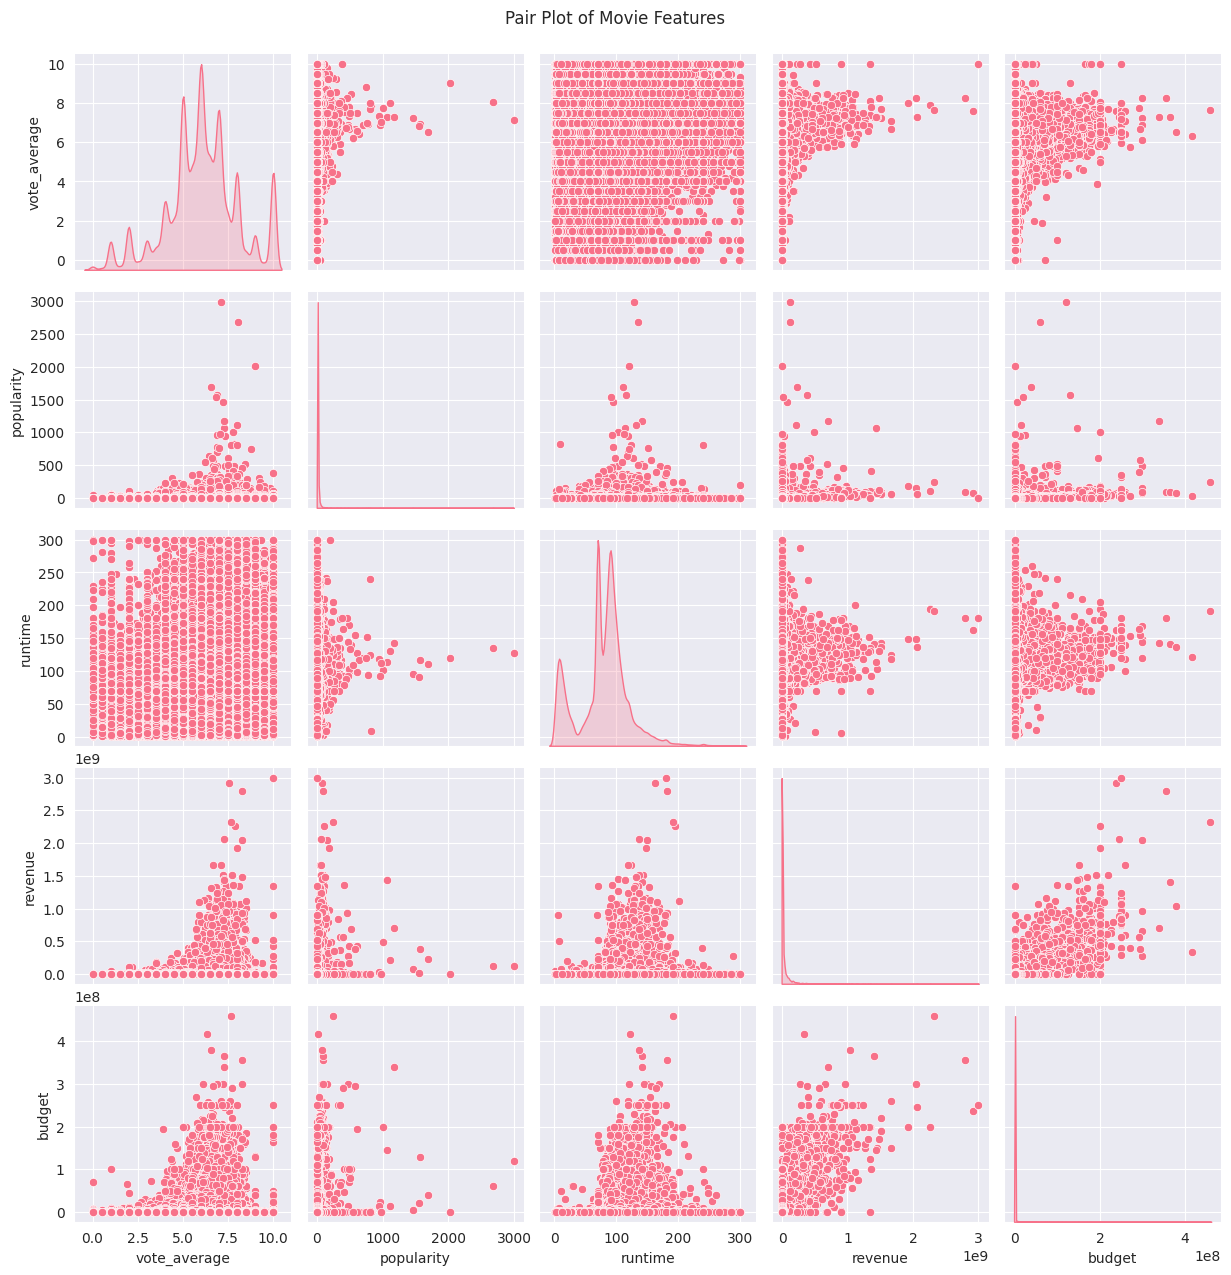

In [ ]:
# Select relevant numeric columns for pair plot
pair_columns = ['vote_average', 'popularity', 'runtime', 'revenue', 'budget']
sns.pairplot(cleaned_df[pair_columns], diag_kind='kde')
plt.suptitle('Pair Plot of Movie Features', y=1.02)
plt.show()

#  Correlation Heatmap

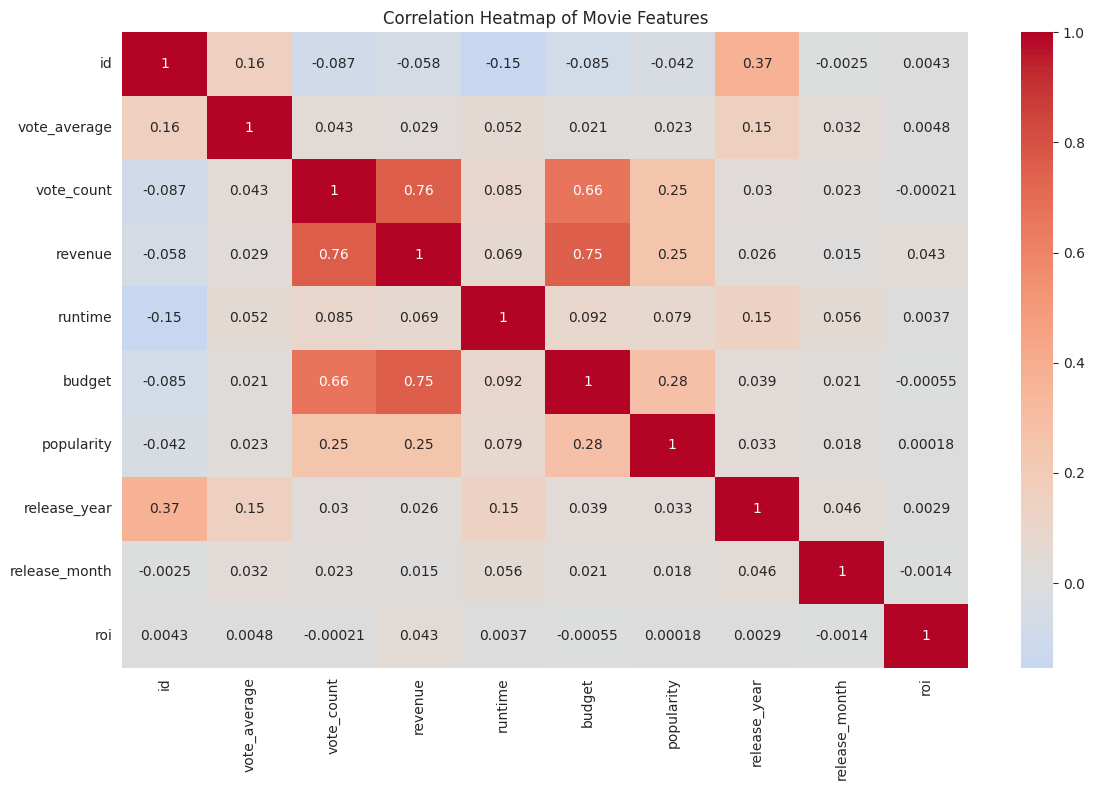

In [ ]:
def create_correlation_heatmap(df):
    """
    Create a correlation heatmap for numeric features
    """
    # Select numeric columns
    numeric_df = df.select_dtypes(include=[np.number])

    # Calculate correlation matrix
    corr_matrix = numeric_df.corr()

    # Create heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap of Movie Features')
    plt.tight_layout()
    plt.show()

create_correlation_heatmap(cleaned_df)

# Scatter Plot with Regression Line

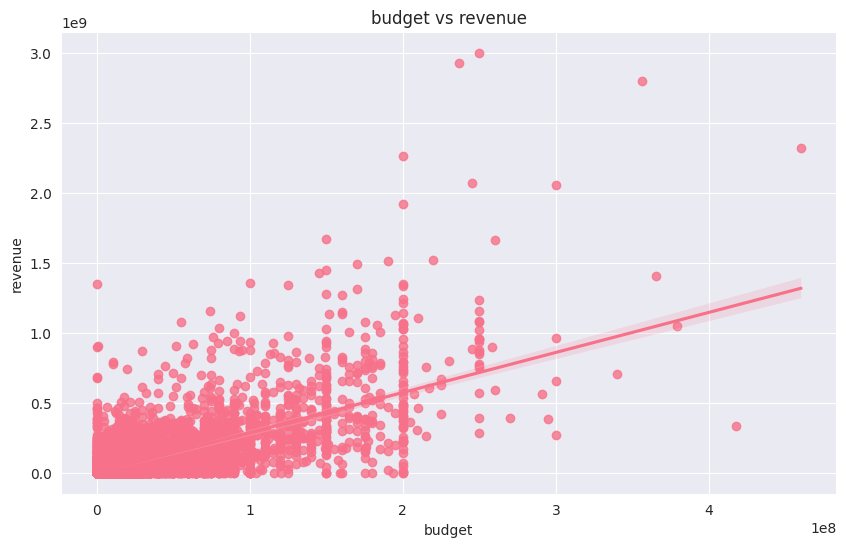

In [ ]:
def plot_scatter_with_reg(df, x_col, y_col):
    """
    Create scatter plot with regression line
    """
    plt.figure(figsize=(10, 6))
    sns.regplot(data=df, x=x_col, y=y_col)
    plt.title(f'{x_col} vs {y_col}')
    plt.show()

# Plot budget vs revenue
plot_scatter_with_reg(cleaned_df, 'budget', 'revenue')

# Data Slicing and Filtering

In [ ]:
class MovieAnalyzer:
    """
    Class for analyzing movie data with various filtering capabilities
    """
    def __init__(self, df):
        self.df = df

    def filter_by_year(self, year):
        """Filter movies by release year"""
        return self.df[self.df['release_year'] == year]

    def filter_by_genre(self, genre):
        """Filter movies by genre"""
        return self.df[self.df['genres'].str.contains(genre, case=False, na=False)]

    def get_top_movies(self, column, n=10, ascending=False):
        """Get top N movies based on a specific column"""
        return self.df.nlargest(n, column)

    def get_movies_by_condition(self, column, condition, value):
        """
        Filter movies based on a condition
        Example: get_movies_by_condition('budget', '>', 1000000)
        """
        if condition == '>':
            return self.df[self.df[column] > value]
        elif condition == '<':
            return self.df[self.df[column] < value]
        elif condition == '==':
            return self.df[self.df[column] == value]

    def get_statistical_summary(self, *columns):
        """Get statistical summary of specified columns"""
        return self.df[list(columns)].describe()

# Create analyzer instance
analyzer = MovieAnalyzer(cleaned_df)

Movies from 2020:
         id                                              title  vote_average  \
295  495764  Birds of Prey (and the Fantabulous Emancipatio...         7.000   
307  508442                                               Soul         8.150   
347  454626                                 Sonic the Hedgehog         7.345   
354  577922                                              Tenet         7.191   
375  664413                                           365 Days         7.063   

     vote_count    status release_date    revenue  runtime     budget  \
295        9654  Released   2020-02-05  205372791      108   75000000   
307        9473  Released   2020-12-25  136384442      101  150000000   
347        8901  Released   2020-02-12  319715683       99   85000000   
354        8744  Released   2020-08-22  365304105      150  205000000   
375        8429  Released   2020-02-07    9458590      116          0   

                                              overview  popula

In [ ]:
print("Movies from 2020:")
analyzer.filter_by_year(2020).head()

Movies from 2020:


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords,release_year,release_month,roi
295,495764,Birds of Prey (and the Fantabulous Emancipatio...,7.000,9654,Released,2020-02-05,205372791,108,75000000,"Harley Quinn joins forces with a singer, an as...",49.330,Mind Over Mayhem,"Action, Crime","Warner Bros. Pictures, DC Films, LuckyChap Ent...",United States of America,English,"police, pickpocket, chase, joker, psychopath, ...",2020,2,1.738304
307,508442,Soul,8.150,9473,Released,2020-12-25,136384442,101,150000000,Joe Gardner is a middle school teacher with a ...,48.876,Is all this living really worth dying for?,"Animation, Family, Comedy, Fantasy, Drama","Walt Disney Pictures, Pixar",United States of America,English,"new york city, jazz, musician, cat, self-disco...",2020,12,-0.090770
347,454626,Sonic the Hedgehog,7.345,8901,Released,2020-02-12,319715683,99,85000000,"Powered with incredible speed, Sonic The Hedge...",53.708,A whole new speed of hero.,"Action, Science Fiction, Comedy, Family","Original Film, Blur Studio, Marza Animation Pl...","Japan, United States of America",English,"friendship, video game, san francisco, califor...",2020,2,2.761361
354,577922,Tenet,7.191,8744,Released,2020-08-22,365304105,150,205000000,Armed with only one word - Tenet - and fightin...,44.025,Time runs out.,"Action, Thriller, Science Fiction","Warner Bros. Pictures, Syncopy","United Kingdom, United States of America","English, Estonian","assassin, espionage, spy, time travel, mumbai ...",2020,8,0.781971
375,664413,365 Days,7.063,8429,Released,2020-02-07,9458590,116,0,"A woman falls victim to a dominant mafia boss,...",32.781,NaN,"Romance, Drama","Ekipa, Future Space, Next Film, TVN Group",Poland,"English, French, Italian, Polish","kidnapping, gangster, yacht, nightclub, mansio...",2020,2,0.000000


In [ ]:
print("\nTop 5 highest budget movies:")
analyzer.get_top_movies('budget', 5)[['title', 'budget', 'revenue']]



Top 5 highest budget movies:


,title,budget,revenue
282,Avatar: The Way of Water,460000000,2320250281
30002,Lost in the Stars,417549000,334039200
153,Pirates of the Caribbean: On Stranger Tides,379000000,1045713802
23,Avengers: Age of Ultron,365000000,1405403694
15,Avengers: Endgame,356000000,2800000000


In [ ]:
print("\nStatistical summary of revenue and budget:")
analyzer.get_statistical_summary('revenue', 'budget')


Statistical summary of revenue and budget:


,revenue,budget
count,3.422670e+05,3.422670e+05
mean,2.110302e+06,7.982747e+05
std,2.986180e+07,7.834841e+06
min,-1.200000e+01,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00
max,3.000000e+09,4.600000e+08


# NumPy Array Operations

In [ ]:
def perform_numpy_operations(*args, **kwargs):
    """
    Demonstrate NumPy operations on movie data
    """
    try:
        # Convert relevant columns to NumPy arrays
        revenue_array = args[0]['revenue'].to_numpy()
        budget_array = args[0]['budget'].to_numpy()

        # Basic statistics using NumPy
        stats = {
            'mean_revenue': np.mean(revenue_array),
            'median_budget': np.median(budget_array),
            'std_revenue': np.std(revenue_array),
            'revenue_budget_ratio': np.mean(revenue_array/np.where(budget_array == 0, 1, budget_array))
        }

        # Additional calculations based on kwargs
        if 'percentile' in kwargs:
            stats['revenue_percentile'] = np.percentile(revenue_array, kwargs['percentile'])

        return stats

    except Exception as e:
        print(f"Error in numpy operations: {e}")
        return None


stats = perform_numpy_operations(cleaned_df, percentile=90)
print("NumPy Statistical Analysis:")
for key, value in stats.items():
    print(f"{key}: {value:,.2f}")

NumPy Statistical Analysis:
mean_revenue: 2,110,301.77
median_budget: 0.00
std_revenue: 29,861,756.65
revenue_budget_ratio: 143,002.02
revenue_percentile: 0.00
